<a href="https://colab.research.google.com/github/hemanth714444/2203A52192_DAUP/blob/main/2203A52192_DAUP_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

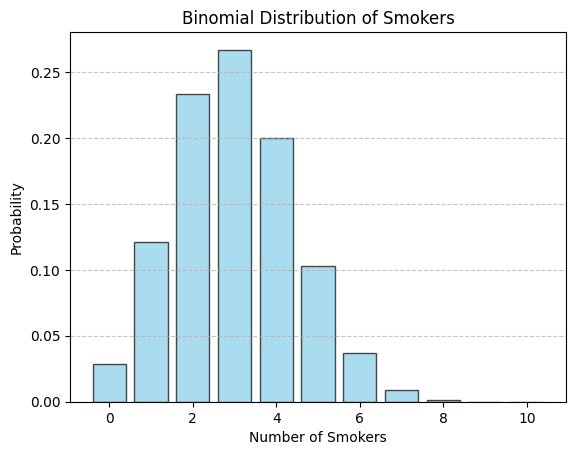

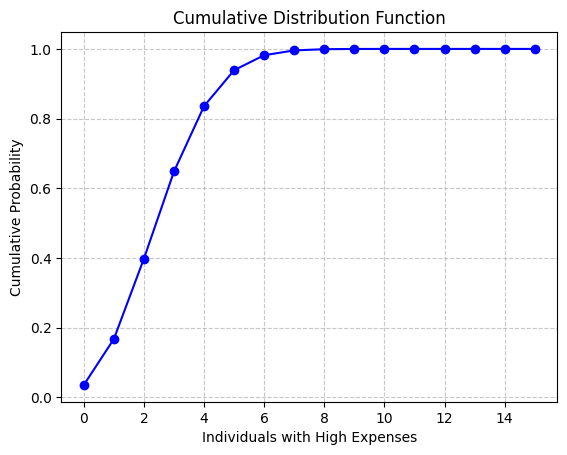

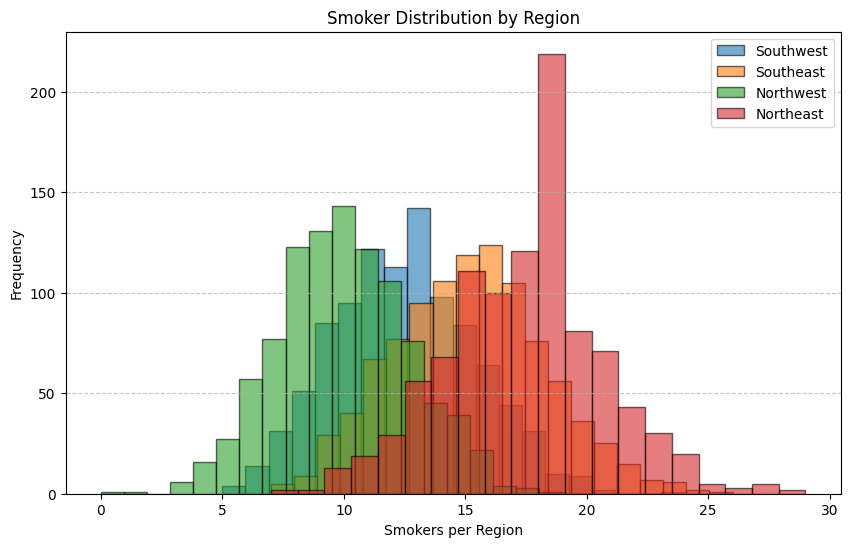

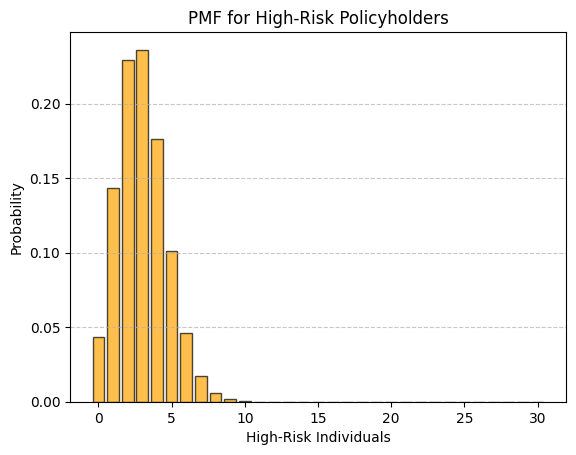

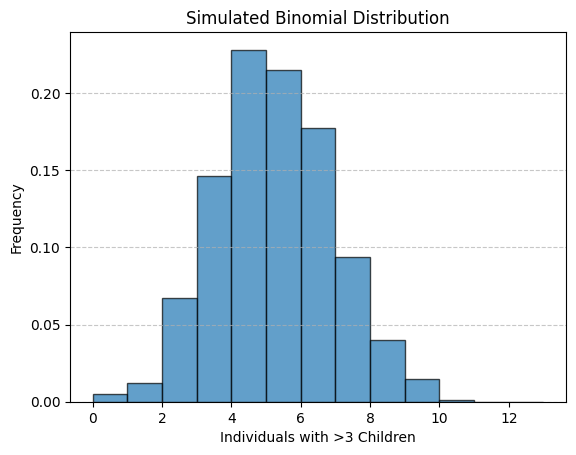

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

file_path = "/content/insurance.csv"
df = pd.read_csv(file_path)

p_smoker = 0.3
n = 10
x = np.arange(0, n + 1)

p_at_least_4 = 1 - binom.cdf(3, n, p_smoker)

binom_pmf = binom.pmf(x, n, p_smoker)
plt.bar(x, binom_pmf, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Smokers')
plt.ylabel('Probability')
plt.title('Binomial Distribution of Smokers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

p_expensive = 0.2
n_exp = 15
x_exp = np.arange(0, n_exp + 1)

p_exactly_5 = binom.pmf(5, n_exp, p_expensive)

p_at_most_5 = binom.cdf(5, n_exp, p_expensive)

binom_cdf = binom.cdf(x_exp, n_exp, p_expensive)
plt.plot(x_exp, binom_cdf, marker='o', linestyle='-', color='b')
plt.xlabel('Individuals with High Expenses')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

region_probs = {"Southwest": 0.25, "Southeast": 0.30, "Northwest": 0.20, "Northeast": 0.35}
n_region = 50
np.random.seed(42)
simulated_data = {region: np.random.binomial(n_region, p, 1000) for region, p in region_probs.items()}

plt.figure(figsize=(10, 6))
for region, data in simulated_data.items():
    plt.hist(data, bins=20, alpha=0.6, label=region, edgecolor='black')
plt.xlabel('Smokers per Region')
plt.ylabel('Frequency')
plt.title('Smoker Distribution by Region')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

threshold_percentile = 0.90
threshold_index = int(threshold_percentile * len(df))
high_risk_threshold = df['expenses'].sort_values().iloc[threshold_index]
p_high_risk = (df['expenses'] > high_risk_threshold).mean()
n_sample = 30
p_8_high_risk = binom.pmf(8, n_sample, p_high_risk)

x_high_risk = np.arange(0, n_sample + 1)
binom_pmf_high_risk = binom.pmf(x_high_risk, n_sample, p_high_risk)
plt.bar(x_high_risk, binom_pmf_high_risk, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('High-Risk Individuals')
plt.ylabel('Probability')
plt.title('PMF for High-Risk Policyholders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

p_more_than_3_children = 0.4
n_children_sample = 12
x_children = np.arange(0, n_children_sample + 1)
p_at_least_5_children = 1 - binom.cdf(4, n_children_sample, p_more_than_3_children)

simulated_children = np.random.binomial(n_children_sample, p_more_than_3_children, 1000)
plt.hist(simulated_children, bins=range(0, n_children_sample+2), alpha=0.7, edgecolor='black', density=True)
plt.xlabel('Individuals with >3 Children')
plt.ylabel('Frequency')
plt.title('Simulated Binomial Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

simulated_mean = np.mean(simulated_children)
simulated_variance = np.var(simulated_children, ddof=1)
theoretical_mean = n_children_sample * p_more_than_3_children
theoretical_variance = n_children_sample * p_more_than_3_children * (1 - p_more_than_3_children)
